In [7]:
%matplotlib inline
import research_kit_bottom_trend_follow as rk

merged_results = rk.get_joined_params_and_summary()

normal_results = merged_results.query("inverse_trading == False")
inversed_results = merged_results.query("inverse_trading == True")

bot = rk.BottomTrendFollow(db_client=rk.mysql_client, exchange_client=rk.bitmex_exchange_client, is_backtest=True)

data loaded


In [2]:
def profit_factor_analysis(df, figure_title):
    columns_picked_up = df.sort_values("profit_factor", ascending=False).loc[:,[
        "timeframe",
        "bottom_trend_tick",
        "middle_trend_tick",
        "top_trend_tick",
        "profit_factor"
    ]]
    
    bins=100
    
    timeframe_params = [60,30,10,1]
    
    fig_profit_factor_histogram = rk.plt.figure()
    fig_profit_factor_histogram.suptitle(figure_title, fontsize=16, y=1.01)
    #fig_profit_factor_histogram.subplots_adjust(wspace=0.4, hspace=0.6)
    profit_factor_histogram_all = fig_profit_factor_histogram.add_subplot(len(timeframe_params)+1,1,1)
    profit_factor_histogram_all.hist(df.profit_factor, bins=100)
    profit_factor_histogram_all.set_title("profit factor distribution for all rows")
    profit_factor_histogram_all.set_xlabel("profit factor")
    profit_factor_histogram_all.set_ylabel("freq")
    
    profit_factor_histogram_all.set_xlim(0.5,1.7)
    
    for i, timeframe in enumerate(timeframe_params):
        profit_factor_histogram = fig_profit_factor_histogram.add_subplot(len(timeframe_params) + 1,1, 2 + i)
        profit_factor_histogram.hist(columns_picked_up.query("timeframe==" + str(timeframe)).profit_factor, bins=bins)
        profit_factor_histogram.set_title("profit factor distribution for timeframe=" + str(timeframe))
        profit_factor_histogram.set_xlabel("profit factor")
        profit_factor_histogram.set_ylabel("freq")
        
        profit_factor_histogram.set_xlim(0.5,1.7)
        
    rk.plt.rcParams['figure.figsize'] = (10.0, 10.0)
    fig_profit_factor_histogram.tight_layout()
    

In [3]:
def visualize_timeframe_entry_profit_relation(df, figure_title, inversed=False):
    rk.plt.rcParams['figure.figsize'] = (10.0, 10.0)
    title = "timeframe entry and profit total profit"
    if inversed:
        title += " inversed"
    
    figure_timeframe_entry_profit = rk.plt.figure()
    figure_timeframe_entry_profit.suptitle(figure_title, fontsize=16, y=1.01)
    graph1 = figure_timeframe_entry_profit.add_subplot(1,1,1)
    graph1.set_title(title)
    graph1.set_xlabel("total_entry")
    graph1.set_ylabel("total return")

    for t in [60,30,10,1]:
        graph1.scatter(df[df.timeframe == t].total_entry,
                       df[df.timeframe == t].total_return,
                   alpha=0.5,linewidths="1", label="timeframe:" + str(t))
        graph1.legend()
    
    figure_timeframe_entry_profit.tight_layout()

In [9]:
merged_results = rk.get_joined_params_and_summary()

normal_results = merged_results.query("inverse_trading == False")
inversed_results = merged_results.query("inverse_trading == True")

data loaded


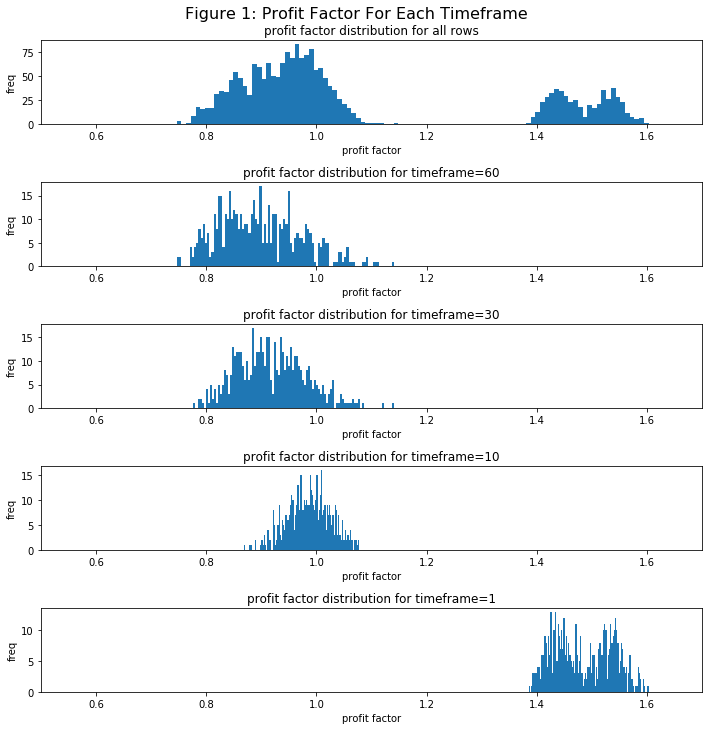

In [12]:
profit_factor_analysis(normal_results, "Figure 1: Profit Factor For Each Timeframe")

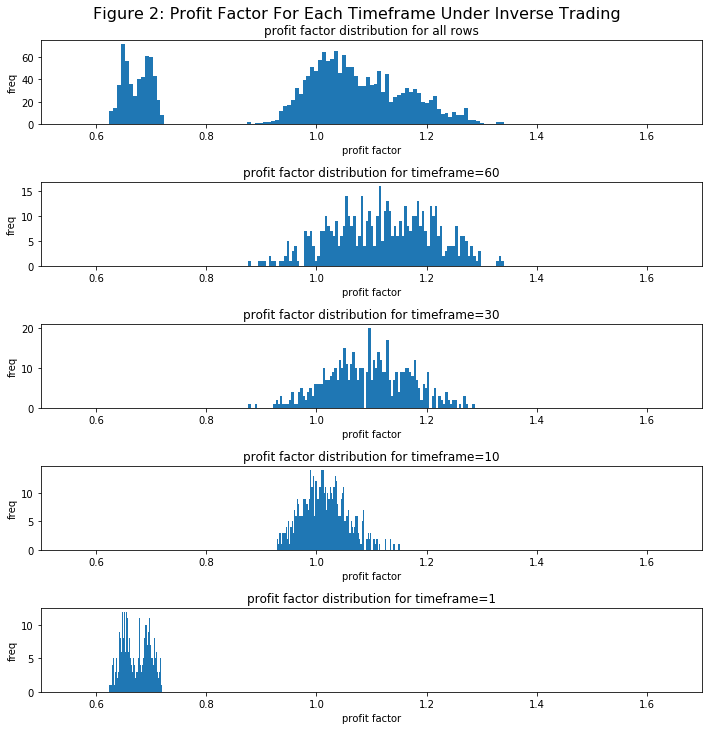

In [11]:
profit_factor_analysis(inversed_results, "Figure 2: Profit Factor For Each Timeframe Under Inverse Trading")

In [ ]:
visualize_timeframe_entry_profit_relation(normal_results,
    "Figure 3: Total Return and Total Entry Relationship for each timeframe",
    inversed=False)

In [ ]:
visualize_timeframe_entry_profit_relation(inversed_results,
    "Figure 4: Total Return and Total Entry Relationship for Each Timeframe on Inverse Trading",
    inversed=True)

# Profit Factor Analysis Summary

## Histograms and Distributions

As you see, Figure 1 hisograms show tendency that the shorter timeframe, the better profit factor.
However, it may be implied that the result caused by just a overfitting and such parameters with short timeframe
would work not well in real environment.

In this part, record the average rank for each timeframe and parameter.
The calculation order is bottom -> middle -> top, because the shorter tick has larger effect to the result.
Hence the result of calculation regard as a representative and optimal parameter for each timeframe.

## Scatterplots for Each Timeframe

Figure3 show that there are clusters for each timeframe clearly.
From this figure, we can see that for the shorter timeframe, gain the better profit.
Especially in timeframe=1, there are 2 clusters inside. I'll discuss the difference between 2 clusters in later part.
Furthermore, the entry time is highly correlated with the profit.

Figure4 indicate that inverse trading mode works well.

After that, simulate the investment result 100,000 times using bootstrap method with these representative parameters,
then check the investment simulation result of average, mode, median and percentile.


## Histograms and Distributions(Ja)

Figure1を見ると、きれいな双峰分布になっていることが見て取れる。
続いてtimeframe別のグラフを見ていくと、timeframeが小さくなっていくにつれてプロフィットファクターが大きくなっていることがわかる。
だがこの傾向があまりに明白であることと、timeframe、すなわち時間足が短くなればなるほど良い結果が得られることから、
これらのパラメータが過剰にデータセットに適合していて、本番環境ではうまくいかない可能性がある。

Figure2を見ると、Figure1とプロフィットファクターが1の箇所で線対称なグラフになっている。
続いてFigure2の2つ目のグラフを見ていくと、timeframeが60の時に最も期待プロフィットファクターが高くなっている。

## Scatterplots for Each Timeframe

Figre3はx軸にtotal_entryを、y軸にtotal_profitを設定している。
これを見ると、各timeframeごとに明確にクラスターを形成していることがわかる。
timeframeが短ければ短いほど総利益が高まること、特にtimeframe=1のときにはその中で明確に別れる2つのクラスターが存在すること、
そしてそのbotの総エントリー回数と総利益に明確な相関が存在することを示している。
このtimeframe=1のときの2つのクラスターの違いについては今後明らかにする。

Figure4を見るとFigure3とは真逆の結果が得られている。これはinverse tradingがうまく働いていることを示している。